<a href="https://colab.research.google.com/github/AishlyManglani/Deep-Learning_-CMPE258/blob/main/computer%20vision/Xray_pnemonea_classification_with_convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ============================================
# 1. Install & Import Libraries
# ============================================
!pip install -q tensorflow tensorflow_hub tensorflow_datasets

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [5]:
# ============================================
# 2. Load Pneumonia MNIST Dataset
# ============================================
(train_ds, val_ds, test_ds), ds_info = tfds.load(
    'pneumonia_mnist',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    as_supervised=True,
    with_info=True
)

NUM_CLASSES = 2
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

# ============================================
# 3. Preprocessing
# ============================================
def preprocess(image, label):
    image = tf.image.resize(image, IMG_SIZE)
    image = tf.image.grayscale_to_rgb(image)  # Expand channels for CNNs expecting RGB
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_ds = train_ds.map(preprocess).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/pneumonia_mnist/incomplete.2GSW72_1.0.0/pneumonia_mnist-train.tfrecord*...…

Generating val examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/pneumonia_mnist/incomplete.2GSW72_1.0.0/pneumonia_mnist-val.tfrecord*...: …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/pneumonia_mnist/incomplete.2GSW72_1.0.0/pneumonia_mnist-test.tfrecord*...:…

Dataset pneumonia_mnist downloaded and prepared to /root/tensorflow_datasets/pneumonia_mnist/1.0.0. Subsequent calls will reuse this data.


In [6]:
# ============================================
# 4. Build Simple CNN Model
# ============================================
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# ============================================
# 5. Train the Model
# ============================================
EPOCHS = 5

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)

Epoch 1/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.7365 - loss: 0.5887 - val_accuracy: 0.7346 - val_loss: 0.5690
Epoch 2/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.7493 - loss: 0.5596 - val_accuracy: 0.7346 - val_loss: 0.5670
Epoch 3/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.7317 - loss: 0.5700 - val_accuracy: 0.7367 - val_loss: 0.5538
Epoch 4/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.7283 - loss: 0.5677 - val_accuracy: 0.7516 - val_loss: 0.5346
Epoch 5/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.7505 - loss: 0.5351 - val_accuracy: 0.7643 - val_loss: 0.5233


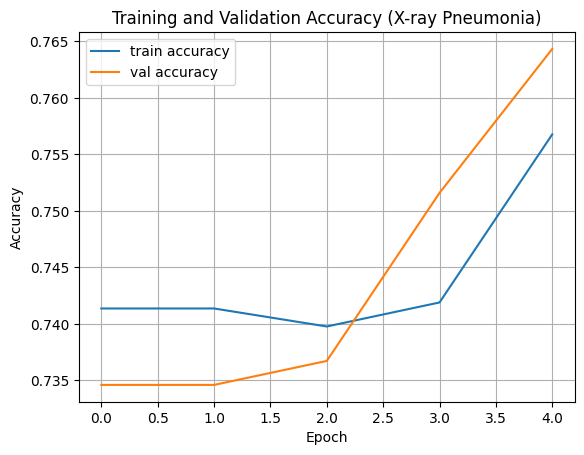

In [8]:
# ============================================
# 5. Visualize Training Results
# ============================================
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Training and Validation Accuracy (X-ray Pneumonia)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()



In [9]:
# ============================================
# 6. Evaluate
# ============================================
test_loss, test_acc = model.evaluate(test_ds)
print(f"✅ Test Accuracy on Pneumonia MNIST: {test_acc:.2f}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7703 - loss: 0.5115
✅ Test Accuracy on Pneumonia MNIST: 0.76
